In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np

In [51]:
AdvancedBattingDf = pd.read_csv('AdvancedBattingClean.csv', float_precision='round_trip')

In [52]:
AdvancedBattingDf

,index,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,LD%,GB%,...,Oppo%,WPA,cWPA,RE24,RS%,SB%,XBT%,Year,Tm,Playoff
0,0,0.330,91,0.290,0.144,0.025,0.161,0.079,0.255,0.377,...,0.201,-10.0,-0.040,-93.3,0.28,0.69,0.44,2001,Anaheim Angels,No
1,1,0.343,91,0.294,0.175,0.033,0.166,0.093,0.246,0.389,...,0.197,-2.9,-0.013,28.4,0.31,0.65,0.42,2001,Arizona Diamondbacks,No
2,2,0.328,85,0.290,0.152,0.028,0.169,0.080,0.226,0.442,...,0.212,-5.9,-0.063,-38.8,0.30,0.65,0.45,2001,Atlanta Braves,No
3,3,0.317,88,0.278,0.131,0.022,0.161,0.084,0.246,0.392,...,0.199,-10.0,-0.020,-85.3,0.30,0.72,0.47,2001,Baltimore Orioles,No
4,4,0.341,100,0.300,0.173,0.032,0.181,0.083,0.252,0.402,...,0.200,-2.3,-0.015,-19.2,0.30,0.57,0.34,2001,Boston Red Sox,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,25,0.322,99,0.287,0.168,0.033,0.224,0.080,0.228,0.405,...,0.167,1.2,-0.013,3.6,0.30,0.80,0.43,2021,St. Louis Cardinals,Yes
596,26,0.328,112,0.294,0.186,0.036,0.248,0.094,0.229,0.424,...,0.177,8.0,0.061,120.0,0.35,0.68,0.47,2021,Tampa Bay Rays,No
597,27,0.297,82,0.280,0.143,0.028,0.232,0.073,0.225,0.463,...,0.185,-16.7,-0.029,-136.9,0.29,0.79,0.41,2021,Texas Rangers,No
598,28,0.345,113,0.296,0.200,0.043,0.201,0.082,0.245,0.405,...,0.176,3.7,0.029,103.8,0.33,0.80,0.41,2021,Toronto Blue Jays,No


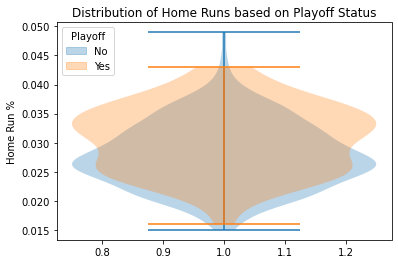

In [154]:
labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

add_label(plt.violinplot(AdvancedBattingDf.loc[AdvancedBattingDf['Playoff'] == 'No', 'HR%']),'No')
add_label(plt.violinplot(AdvancedBattingDf.loc[AdvancedBattingDf['Playoff'] == 'Yes', 'HR%']),'Yes')
plt.ylabel('Home Run %')
plt.title('Distribution of Home Runs based on Playoff Status')
plt.legend(*zip(*labels), loc=2, title='Playoff')
plt.show()

Text(0.5, 1.0, 'Winning Probability vs Home Run %')

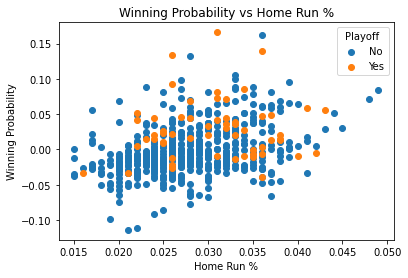

In [155]:
plt.scatter(AdvancedBattingDf.loc[AdvancedBattingDf['Playoff'] == 'No', 'HR%'],AdvancedBattingDf.loc[AdvancedBattingDf['Playoff'] == 'No', 'cWPA'], label='No')
plt.scatter(AdvancedBattingDf.loc[AdvancedBattingDf['Playoff'] == 'Yes', 'HR%'],AdvancedBattingDf.loc[AdvancedBattingDf['Playoff'] == 'Yes', 'cWPA'], label='Yes')
plt.legend(title='Playoff')
plt.ylabel('Winning Probability')
plt.xlabel('Home Run %')
plt.title('Winning Probability vs Home Run %')

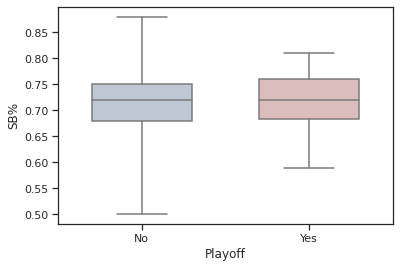

In [170]:
sns.set_theme(style="ticks")
sns.boxplot(x="Playoff", y="SB%", data=AdvancedBattingDf,
            whis=[0, 100], width=.6, palette="vlag")

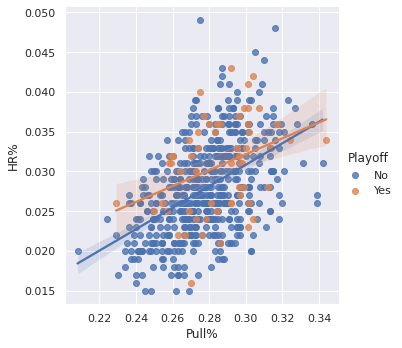

In [168]:
sns.set_theme()
sns.lmplot(data=AdvancedBattingDf, x="Pull%", y="HR%", hue="Playoff", height=5)

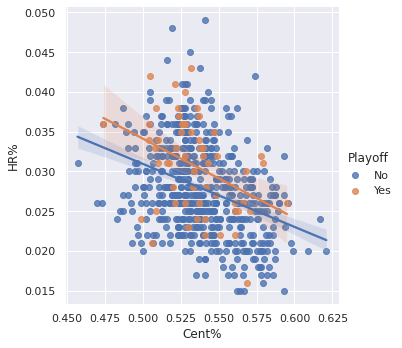

In [164]:
sns.set_theme()
sns.lmplot(data=AdvancedBattingDf, x="Cent%", y="HR%", hue="Playoff", height=5)

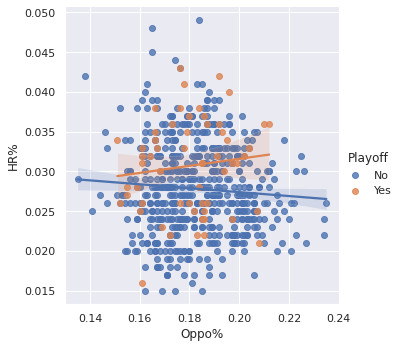

In [165]:
sns.set_theme()
sns.lmplot(data=AdvancedBattingDf, x="Oppo%", y="HR%", hue="Playoff", height=5)

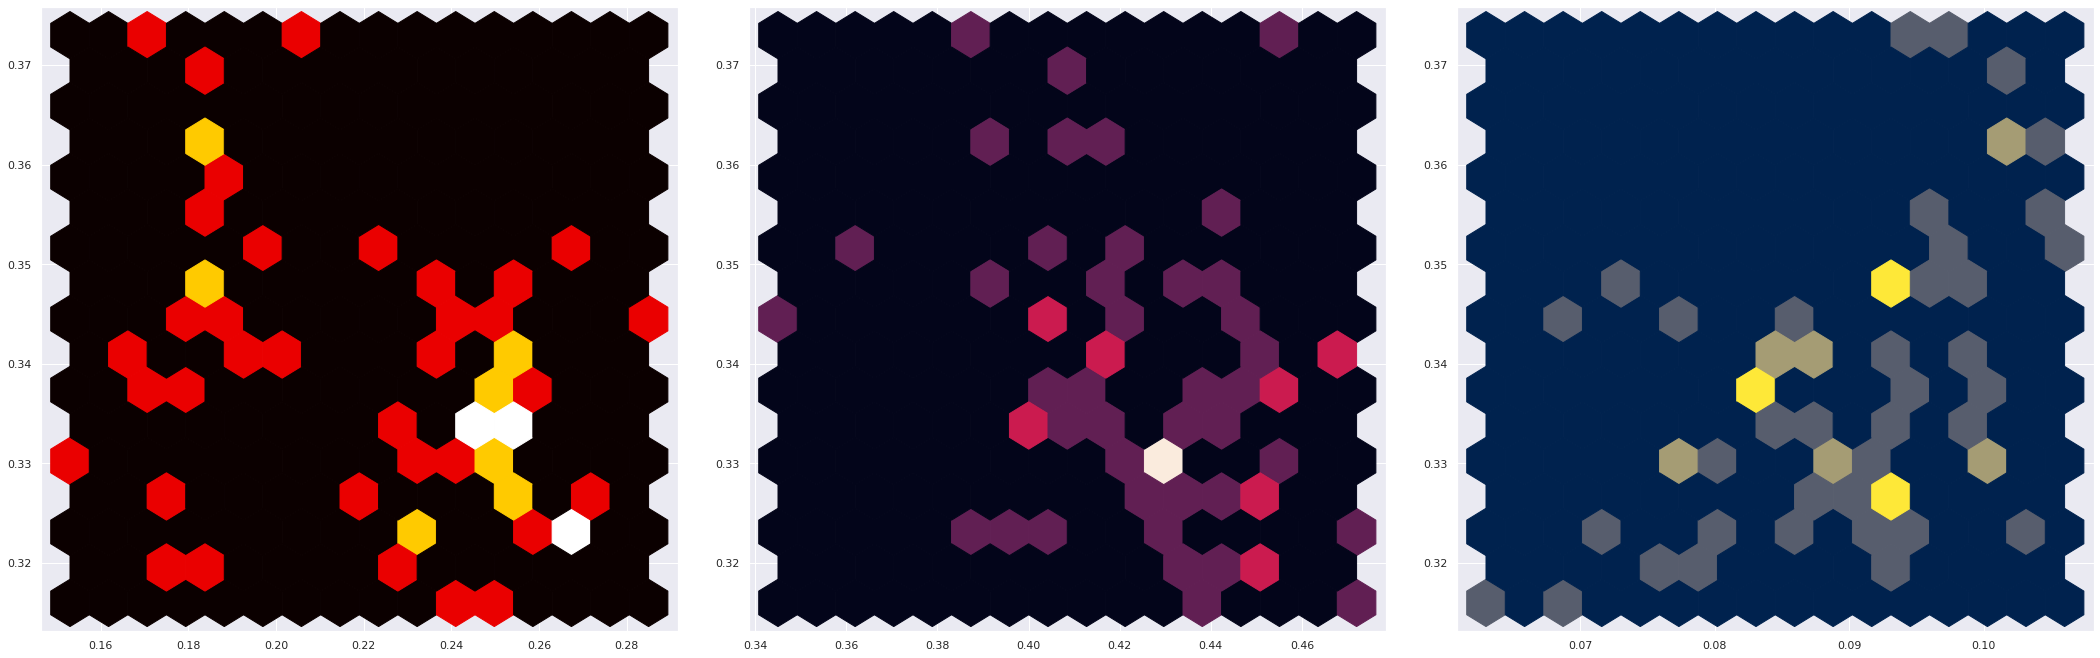

In [166]:
X1=AdvancedBattingDf.loc[AdvancedBattingDf['Playoff']=='Yes', ['LD%','rOBA']].sort_values('LD%')
X2=AdvancedBattingDf.loc[AdvancedBattingDf['Playoff']=='Yes', ['GB%','rOBA']].sort_values('GB%')
X3=AdvancedBattingDf.loc[AdvancedBattingDf['Playoff']=='Yes', ['BB%','rOBA']].sort_values('BB%')

fig, ax=plt.subplots(nrows = 1, ncols = 3, figsize=(30,10))
fig.tight_layout(pad=3.0)
ax[0].hexbin(X1['LD%'],X1['rOBA'], gridsize=15, cmap='hot')
ax[1].hexbin(X2['GB%'], X2['rOBA'], gridsize=15)
ax[2].hexbin(X3['BB%'], X3['rOBA'], gridsize=15, cmap='cividis')